### Importing necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

### Importing data

In [4]:
relative_path = os.path.join('..', 'exported_cleaned_file', 'fifa_21_cleaned_df.csv')

# Construct the absolute path
absolute_path = os.path.abspath(relative_path)

# Read the CSV file into a DataFrame
df = pd.read_csv(absolute_path)

In [5]:
df

,Full_Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height_in_cm,Weight_in_kg,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,...,Medium,Low,5,85,92,91,95,38,65,771
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,...,High,Low,5,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,...,Medium,Medium,3,87,92,78,90,52,90,150
3,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,...,High,High,4,76,86,93,88,64,78,207
4,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,...,High,Medium,5,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,Ao Xia,China PR,21,47,55,Wuhan Zall,2018 ~ 2022,CB,178,66,...,Medium,Medium,1,64,28,26,38,48,51,No record
18975,Ben Hough,England,17,47,67,Oldham Athletic,2020 ~ 2021,CM,175,65,...,Medium,Medium,1,64,40,48,49,35,45,No record
18976,Ronan McKinley,England,18,47,65,Derry City,2019 ~ 2020,CM,179,74,...,Medium,Medium,1,63,39,44,46,40,53,No record
18977,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,2020 ~ 2022,RW,175,69,...,Medium,Medium,1,58,49,41,49,30,44,No record


#### Creating a histogram based on Age column

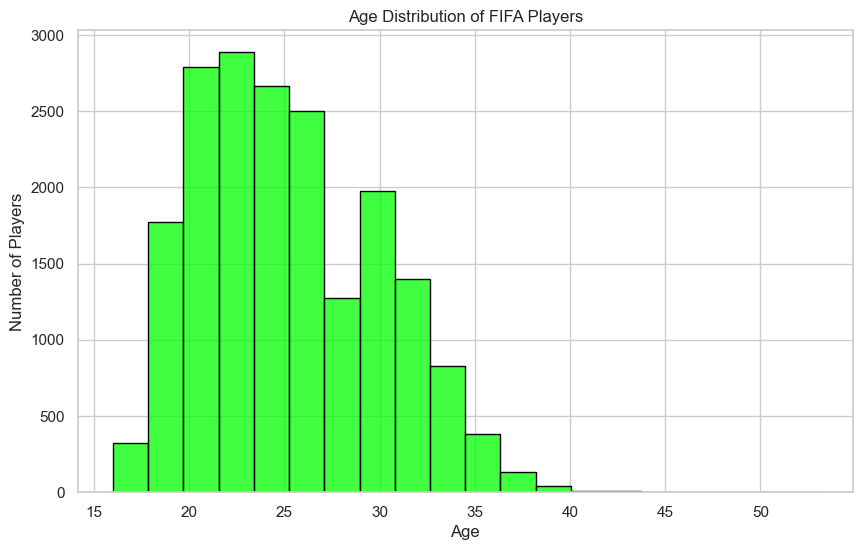

In [15]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=False, color='lime', edgecolor='black')

# Set the title and labels
plt.title('Age Distribution of FIFA Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')

# Display the plot
plt.show()

#### Creating a histogram based on ↓OVA(Ratings) column

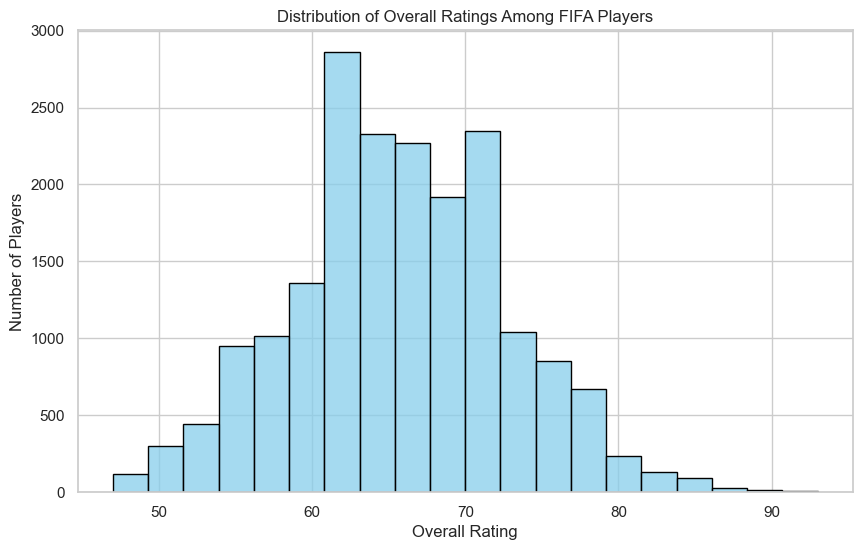

In [7]:
# Set the Seaborn color palette
sns.set_palette('muted')

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['↓OVA'], bins=20, color='skyblue', edgecolor='black', kde=False)

# Set the title and labels
plt.title('Distribution of Overall Ratings Among FIFA Players')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')

# Display the plot
plt.show()

#### Creating a bar chart based on Nationality column for top 10 nations with the most players in a dataframe

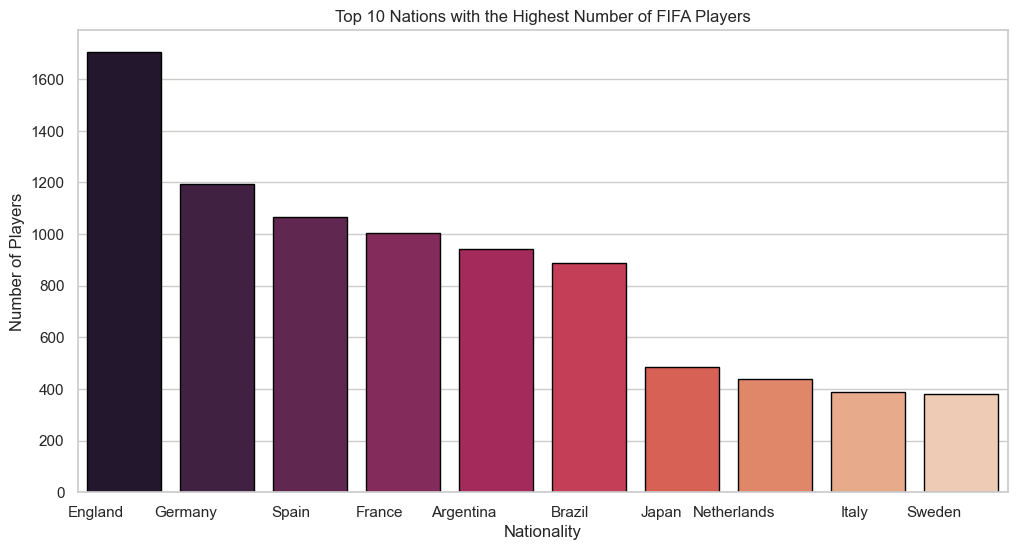

In [16]:
# Get the top 10 nations with the highest number of players
top_nations = df['Nationality'].value_counts().nlargest(10)

# Create a bar chart using Seaborn with 'rocket' color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=top_nations.index, y=top_nations.values, palette='rocket', edgecolor='black')

# Set the title and labels
plt.title('Top 10 Nations with the Highest Number of FIFA Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0, ha='right')

# Display the plot
plt.show()

#### Creating a pie chart based on Preferred Foot column

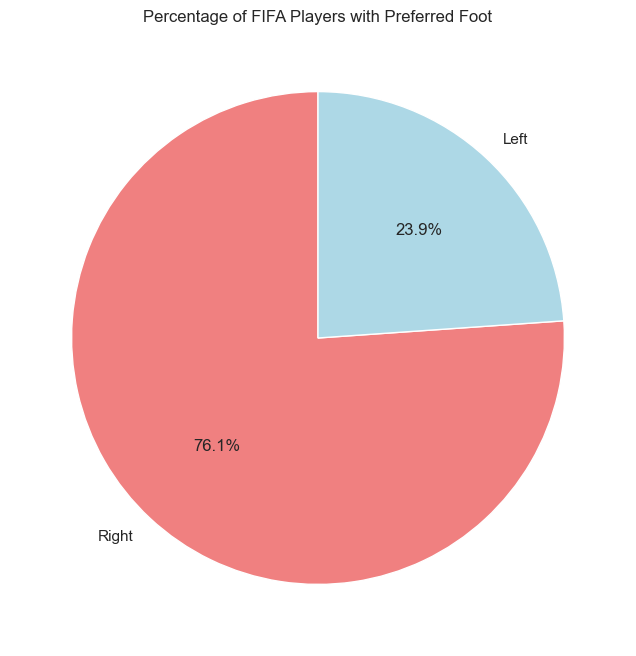

In [9]:
# Get the distribution of players based on preferred foot
foot_distribution = df['Preferred Foot'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(foot_distribution, labels=foot_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])

# Set the title
plt.title('Percentage of FIFA Players with Preferred Foot')

# Display the plot
plt.show()

#### Creating a scatter plot based on Value_in_millions_of_€ and ↓OVA(Ratings) columns for relationship between market value and ratings

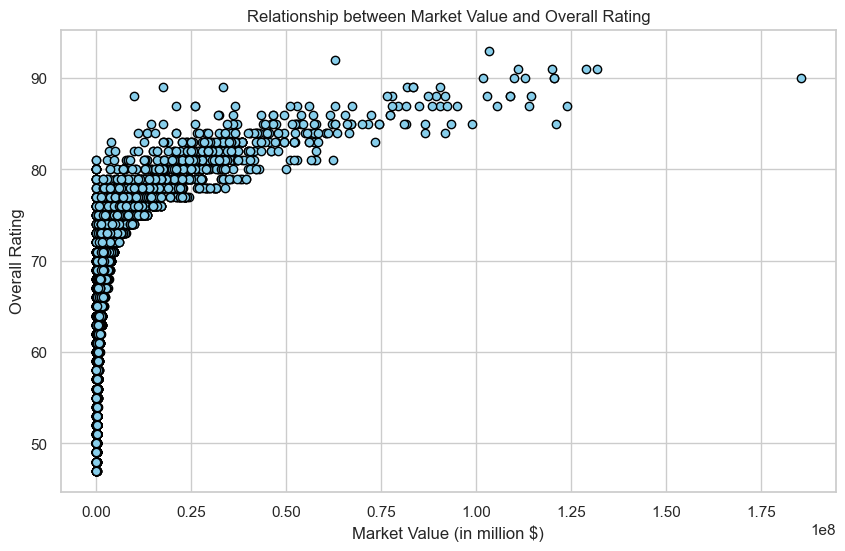

In [10]:
# Create a scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['Value_in_millions_of_€'], df['↓OVA'], color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Relationship between Market Value and Overall Rating')
plt.xlabel('Market Value (in million $)')
plt.ylabel('Overall Rating')

# Display the plot
plt.show()

#### Creating a scatter plot based on Height_in_cm and Weight_in_kg columns

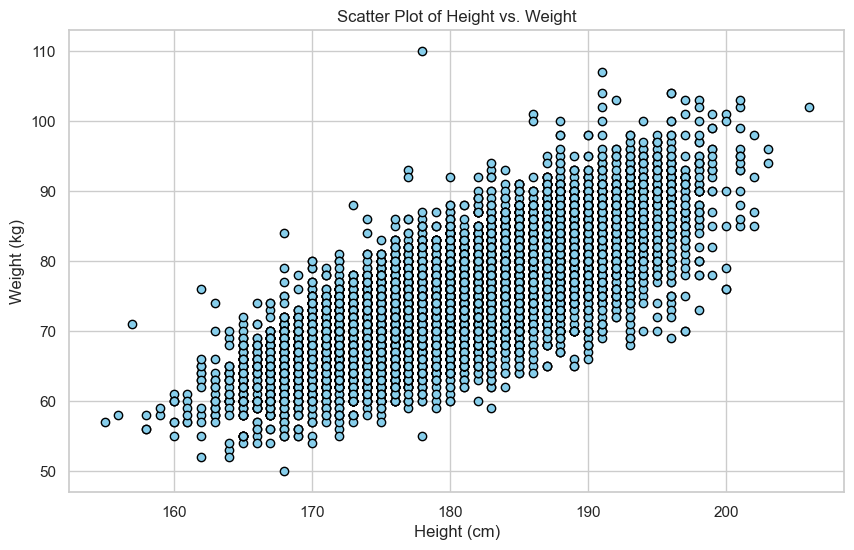

In [11]:
# Create a scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['Height_in_cm'], df['Weight_in_kg'], color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Scatter Plot of Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

# Display the plot
plt.show()

#### Radar chart for AC Milan based on PAC(Pace), SHO(Shooting), PAS(Passing), DRI(Dribbling), DEF(Defence) and PHY(Physique) columns

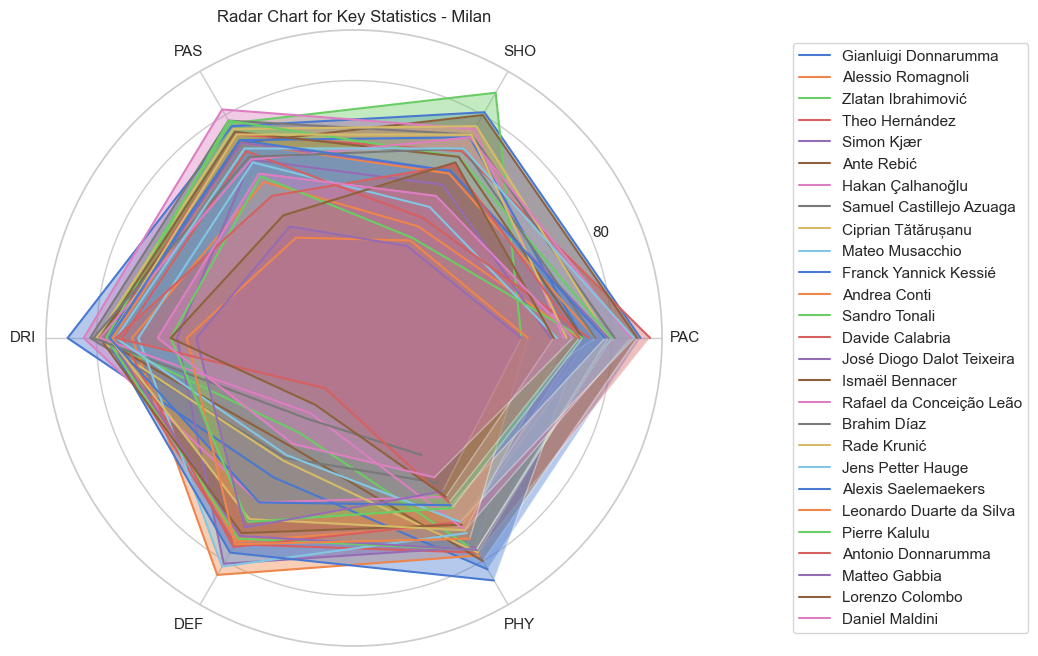

In [12]:
# Select a specific club
club_name = 'Milan'  # Replace with the desired club name

# Filter the DataFrame for players from the specified club
club_data = df[df['Club'] == club_name]

# Select relevant columns for radar chart
radar_columns = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

# Number of variables
num_vars = len(radar_columns)

# Find the maximum length among radar columns
max_length = club_data[radar_columns].applymap(lambda x: len(str(x))).max().max()

# Create a radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Compute angles for each variable
theta = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

# Plot data for each player
for _, player in club_data.iterrows():
    stats = player[radar_columns].tolist()
    
    # Pad the shorter lists with their first element
    stats += [stats[0]] * (max_length - len(stats))
    
    ax.plot(theta, stats, label=player['Full_Name'])
    ax.fill(theta, stats, alpha=0.4)

# Set labels for each spoke
ax.set_xticks(theta)
ax.set_xticklabels(radar_columns)

# Set title and legend
plt.title(f'Radar Chart for Key Statistics - {club_name}')
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# Show the radar chart
plt.show()



#### Creating a pie chart based on Playing Position(Positions) column for AC Milan

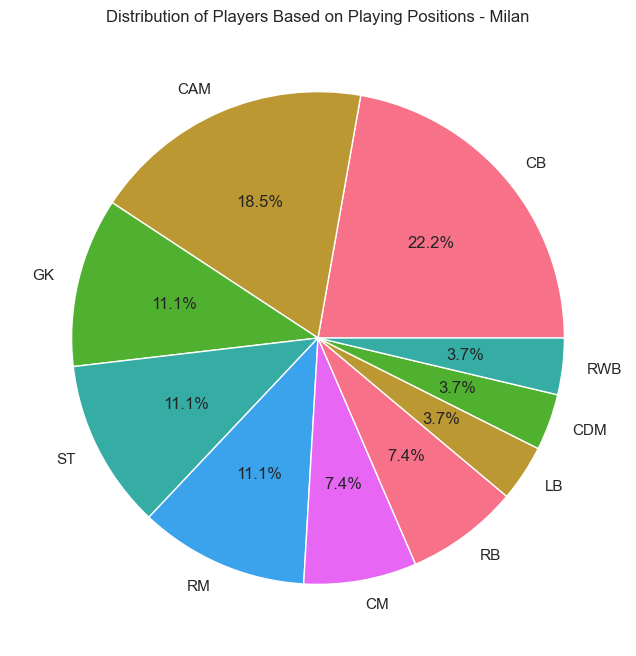

In [13]:
# Select a specific club
club_name = 'Milan'  # Replace with the desired club name

# Filter the DataFrame for players from the specified club
club_data = df[df['Club'] == club_name]

# Count the number of players in each position
position_counts = club_data['Best Position'].value_counts()

# Set Seaborn palette
sns.set_palette("husl")

# Plotting a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', colors=sns.color_palette("husl"))
plt.title(f'Distribution of Players Based on Playing Positions - {club_name}')
plt.show()

#### Creating a pie chart based on Nationality column showing representation of Different Nationalities in the Club for AC Milan

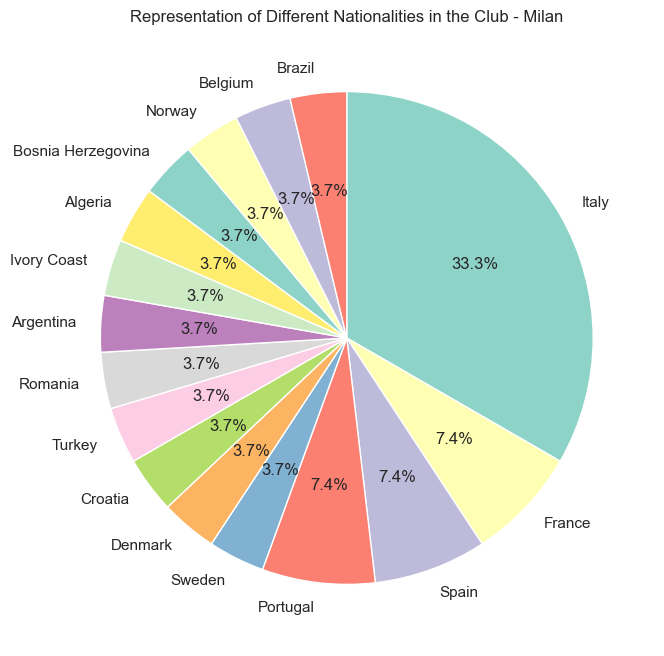

In [14]:
# Select a specific club
club_name = 'Milan'  # Replace with the desired club name

# Filter the DataFrame for players from the specified club
club_data = df[df['Club'] == club_name]

# Count the number of players from each nationality
nationality_counts = club_data['Nationality'].value_counts()


# Plotting a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=plt.cm.Set3.colors)
plt.title(f'Representation of Different Nationalities in the Club - {club_name}')
plt.show()